### EDA


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data=pd.read_csv('./input/train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum()#null값 측정(Age, Cabin, Embarked)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 생존자는?


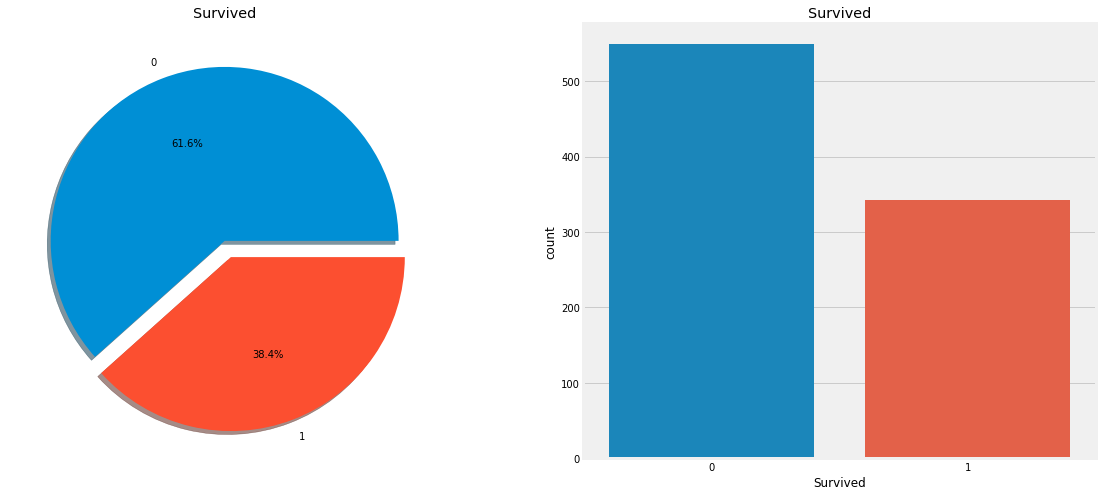

In [8]:
#38.4% , 350명 생존
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Features 유형

<br>

#### Categorical

- 2개 이상의 카테고리

- 값들은 범주화에 속함

- 값들을 정렬할 수 없음(Nominal Variables)

- 예시: Sex, Embarked

<br>

#### Ordinal

- Categorical와 비슷한 속성

- 값들을 정렬할 수 있다

- 예시: PClass

<br>

#### Continous

- 각 열의 최소값과 최대값 구하기 가능

- 예시: Age

#### Categorical Feature: Sex

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

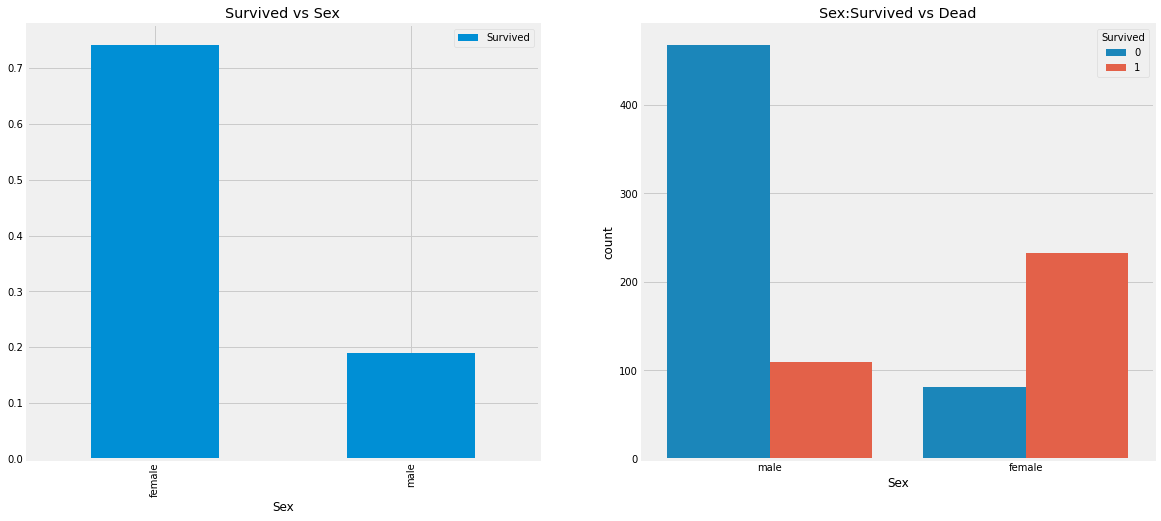

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

데이터를 보면, 남성이 여성보다 탑승객은 많으나 생존자는 혀전히 적다는 것을 알 수 있습니다. 이를 통해서 훗날 모델의 특징을 잡을 때 중요한 요소일 것입니다.

#### Pclass->Ordinal Feature

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Pclass에 따른 탑승객 수와 생존자 수의 상관관계

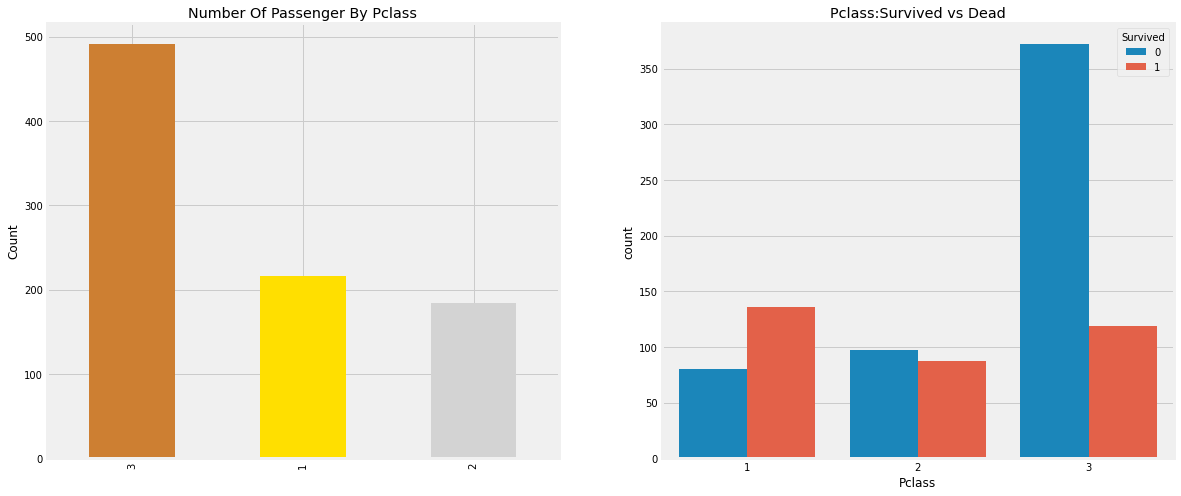

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [15]:
#성별, Pclass, 생존율의 관계

pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

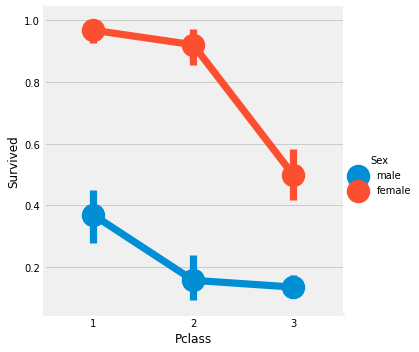

In [16]:
sns.factorplot('Pclass','Survived',hue='Sex', data=data)
plt.show()

Pclass1에 있던 여성 탑승객의 생존률은 95~96%이라는 높은 수치를 보입니다.

즉, Pclass가 생존율에 중요한 영향을 미치는 특징일 것 같습니다.

#### Continous Feature-Age

In [17]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:', data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


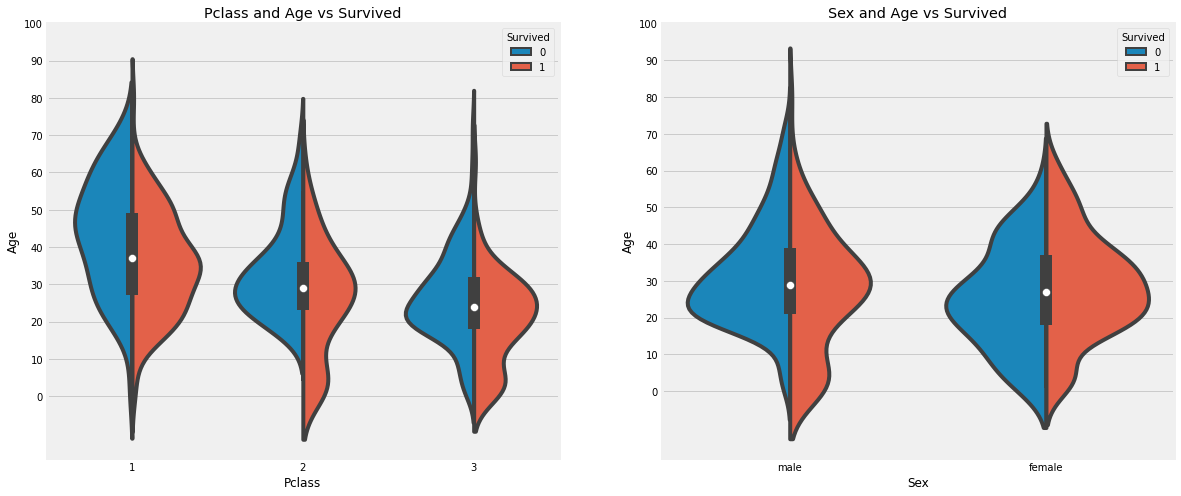

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

10살 보다 어린 아이들의 생존율이 가장 높다.

Pclass1, 20~50대 나이분들의 생존율이 높았고 그 중 여성분의 생존이 가장 높다.

근데, 한 가지 생각해야될 것은 Age의 결측치가 177이나 되기 때문에 데이터의 거짓말이 발생할 수도 있다는 점이다.

그러므로, Name feature(고유값)를 사용해서 이 문제를 타파하자

In [26]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #s뽑기

In [27]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')#성별과 함께 이니셜 체크

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [28]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [30]:
data.groupby('Initial')['Age'].mean() # 평균 이니셜 체크

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [34]:
#Filling NaN Ages


data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Ohter'),'Age'] = 46

In [35]:
data.Age.isnull().any()

False

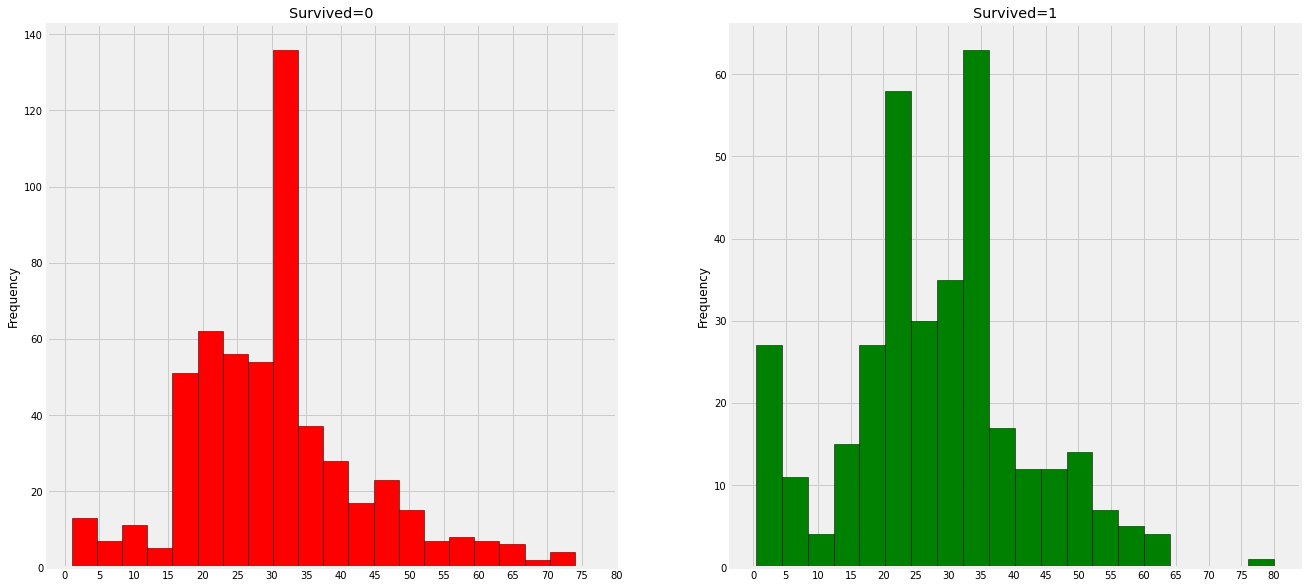

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()


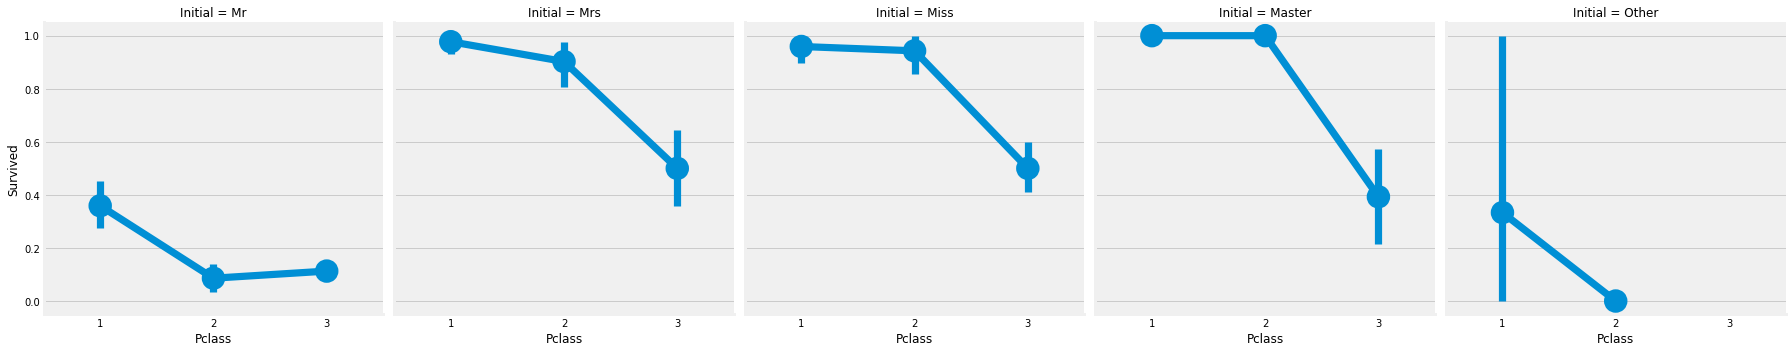

In [37]:
sns.factorplot('Pclass','Survived',col='Initial', data=data)
plt.show()